In [34]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import efficientnet.tfkeras as efn 

import sklearn
import os

In [35]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split

from ImageDataAugmentor.image_data_augmentor import *
from albumentations import (Compose, GaussNoise, Blur, 
                            Affine, Perspective,Sharpen, Superpixels,
                            CenterCrop, ChannelDropout, ChannelShuffle, 
                            CLAHE, CoarseDropout, Downscale, 
                            ElasticTransform, Equalize, FancyPCA, 
                            Flip, GaussianBlur, GlassBlur, 
                            GridDistortion, GridDropout, Posterize, 
                            RandomBrightness, RandomContrast, RandomFog, #RandomBrightnessContrast,
                            RandomGamma, 
                            RandomGridShuffle, #RandomRain, RandomShow, Transpose
                            RandomShadow, RandomRotate90, #RandomResizedCrop
                            
                            VerticalFlip, HorizontalFlip, RandomBrightness, RandomContrast, 
                            OpticalDistortion, HueSaturationValue, ShiftScaleRotate, Cutout, OneOf,
                            ColorJitter
                           )

In [36]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

Num GPUs Available:  2
2 Physical GPUs, 2 Logical GPUs


In [37]:
'path + /datasets/BM_cytomorphology_data/bla_ebo_lyt/testing'


'path + /datasets/BM_cytomorphology_data/bla_ebo_lyt/training'

'/home/mikylab/datasets/BM_cytomorphology_data/bla_ebo_lyt/training'

In [38]:
''' Three class '''
'''
train_dir = 'path + /datasets/BM_cytomorphology_data/bla_ebo_lyt/training'

# Initialize lists to store file names and their respective labels
file_names = []
labels = []

# Iterate over the subdirectories
for sub_dir in os.listdir(train_dir):
    sub_dir_path = os.path.join(train_dir, sub_dir)
    
    # Iterate over files in the subdirectory
    for file_name in os.listdir(sub_dir_path):
        # Append file name to the list
        file_names.append(sub_dir_path + '/' + file_name)
        # Append label to the list
        labels.append(sub_dir)

# Create a DataFrame
data = {'image_dir': file_names, 'target': labels}
train_frame = pd.DataFrame(data)
train_frame.target[train_frame.target == 'BLA'] = 0
train_frame.target[train_frame.target == 'EBO'] = 1
train_frame.target[train_frame.target == 'LYT'] = 2
train_frame
'''

In [39]:
'''Three classes: set the target values'''
test_dir = 'path + /datasets/BM_cytomorphology_data/bla_ebo_lyt/testing'

# Initialize lists to store file names and their respective labels
file_names = []
labels = []

# Iterate over the subdirectories
for sub_dir in os.listdir(test_dir):
    sub_dir_path = os.path.join(test_dir, sub_dir)
    
    # Iterate over files in the subdirectory
    for file_name in os.listdir(sub_dir_path):
        # Append file name to the list
        file_names.append(sub_dir_path + '/' + file_name)
        # Append label to the list
        labels.append(sub_dir)

# Create a DataFrame
data = {'image_dir': file_names, 'target': labels}
test_frame = pd.DataFrame(data)
test_frame.target[test_frame.target == 'BLA'] = 0
test_frame.target[test_frame.target == 'EBO'] = 1
test_frame.target[test_frame.target == 'LYT'] = 2
test_frame.shape

(50610, 2)

In [20]:
'''Six classes: set the target values'''
train_dir = 'path + /datasets/cyto_full/bone_marrow_cell_dataset/classes6/training'

# Initialize lists to store file names and their respective labels
file_names = []
labels = []

# Iterate over the subdirectories
for sub_dir in os.listdir(train_dir):
    sub_dir_path = os.path.join(train_dir, sub_dir)
    
    # Iterate over files in the subdirectory
    for file_name in os.listdir(sub_dir_path):
        # Append file name to the list
        file_names.append(sub_dir_path + '/' + file_name)
        # Append label to the list
        labels.append(sub_dir)

# Create a DataFrame
data = {'image_dir': file_names, 'target': labels}
train_frame = pd.DataFrame(data)
train_frame.target[train_frame.target == 'BLA'] = 0
train_frame.target[train_frame.target == 'EBO'] = 1
train_frame.target[train_frame.target == 'LYT'] = 2
train_frame.target[train_frame.target == 'NGS'] = 3
train_frame.target[train_frame.target == 'PLM'] = 4
train_frame.target[train_frame.target == 'PMO'] = 5
train_frame

In [21]:
test_dir = 'path + /datasets/cyto_full/bone_marrow_cell_dataset/classes6/testing'

# Initialize lists to store file names and their respective labels
file_names = []
labels = []

# Iterate over the main folders
for main_folder in os.listdir(test_dir):
    main_folder_path = os.path.join(test_dir, main_folder)
    
    # Check if it's a directory
    if os.path.isdir(main_folder_path):
        # Iterate over subfolders in the main folder
        for sub_folder in os.listdir(main_folder_path):
            sub_folder_path = os.path.join(main_folder_path, sub_folder)
            
            # Check if it's a directory
            if os.path.isdir(sub_folder_path):
                #print("Processing folder:", sub_folder_path)
                # Iterate over files in the subfolder
                for file_name in os.listdir(sub_folder_path):
                    # Append file name to the list
                    file_names.append(os.path.join(sub_folder_path, file_name))
                    # Append label to the list
                    labels.append(main_folder)  # Use the main folder name as the label

# Now you have file_names and labels populated with the data from all subfolders
# Create a DataFrame
data = {'image_dir': file_names, 'target': labels}
test_frame = pd.DataFrame(data)
test_frame.target[test_frame.target == 'BLA'] = 0
test_frame.target[test_frame.target == 'EBO'] = 1
test_frame.target[test_frame.target == 'LYT'] = 2
test_frame.target[test_frame.target == 'NGS'] = 3
test_frame.target[test_frame.target == 'PLM'] = 4
test_frame.target[test_frame.target == 'PMO'] = 5
test_frame



,image_dir,target
0,/home/mikylab/datasets/cyto_full/bone_marrow_c...,2
1,/home/mikylab/datasets/cyto_full/bone_marrow_c...,2
2,/home/mikylab/datasets/cyto_full/bone_marrow_c...,2
3,/home/mikylab/datasets/cyto_full/bone_marrow_c...,2
4,/home/mikylab/datasets/cyto_full/bone_marrow_c...,2
...,...,...
84652,/home/mikylab/datasets/cyto_full/bone_marrow_c...,0
84653,/home/mikylab/datasets/cyto_full/bone_marrow_c...,0
84654,/home/mikylab/datasets/cyto_full/bone_marrow_c...,0
84655,/home/mikylab/datasets/cyto_full/bone_marrow_c...,0


In [22]:
# train_frame['image_dir'] = train_dir + train_frame['image_dir']
# test_frame['image_dir'] = test_dir + test_frame['image_dir']

In [23]:
# ben_train_frame

# train_frame = pd.concat([train_frame, ben_train_frame], axis=0)
# test_frame = pd.concat([test_frame, ben_test_frame], axis=0)



In [40]:
## Additional augmentations from the https://albumentations.ai library

AUGMENTATIONS = Compose([
                        VerticalFlip(p =.5), 
                        HorizontalFlip(p =.5),
                        RandomBrightness(p = .5), 
                        RandomContrast(p =.5), 
                        OneOf([
                            OpticalDistortion(distort_limit =1.0), 
                            GridDistortion(num_steps=5, distort_limit = 1.), 
                            ElasticTransform(alpha=3),
                        ]),
                        CLAHE(clip_limit=4.0, p=0.7), 
                        HueSaturationValue(hue_shift_limit = 10, sat_shift_limit= 20, val_shift_limit = 10, p = .5), 
                        ShiftScaleRotate (shift_limit = 0.2, scale_limit = 0.1, rotate_limit = 15, border_mode = 0, p = .85), 
                        Cutout(max_h_size = int(256*.375), max_w_size = int(256*.375), num_holes =1, p = 0.7), 
                        
                        Affine(scale = [0.7, 1.3],  translate_percent = .25, rotate = [-360, 360], shear = [0, 20]),
                        ColorJitter(brightness=[0.9, 1.1], contrast=[0.9, 1.1], saturation=[0.9, 1.1], hue=[0, .2], always_apply=False, p=0.5)
    
])



/home/mikylab/.local/lib/python3.8/site-packages/albumentations/augmentations/transforms.py:1699: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(
/home/mikylab/.local/lib/python3.8/site-packages/albumentations/augmentations/transforms.py:1725: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(
/home/mikylab/.local/lib/python3.8/site-packages/albumentations/augmentations/transforms.py:643: FutureWarning: This class has been deprecated. Please use CoarseDropout
  warnings.warn(


In [41]:
# from tensorflow.keras.utils import to_categorical

# #train_frame['encoding'] = to_categorical(train_frame['target'])

# to_categorical(train_frame['target']).shape

In [42]:
## ImageDataAugmentor from https://github.com/mjkvaak/ImageDataAugmentor, used to allow the Albumentations library

train_image_gen = ImageDataAugmentor(rescale=1./255,
                                     augment = AUGMENTATIONS
                                    )
test_image_gen = ImageDataAugmentor(rescale=1./255)

In [43]:
# one_hot_encoded = pd.get_dummies(train_frame['target'], dtype=int)

# train_frame['encoding'] = one_hot_encoded.values.tolist()


# one_hot_encoded = pd.get_dummies(test_frame['target'], dtype=int)


# test_frame['encoding'] = one_hot_encoded.values.tolist()

In [44]:
# train_frame['target'] = train_frame['target'].astype(int)
# test_frame['target'] = test_frame['target'].astype(int)


train_frame['target'] = train_frame['target'].astype(str)

test_frame['target'] = test_frame['target'].astype(str)


In [45]:
# neg_sing, neg, pos = np.bincount(train_frame['target'])
# total = neg_sing+ neg + pos
# # print('Melanoma Classification:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
# #     total, pos, 100 * pos / total))

# print(neg_sing)
# print(neg)
# print(pos)

# weight_for_0 = (1 / neg_sing) * (total / 2.0)
# weight_for_1 = (1 / neg) * (total / 2.0)
# weight_for_2 = (1 / pos) * (total / 2.0)

# class_weight = {0: weight_for_0, 1: weight_for_1, 2: weight_for_2}

# print('Weight for class 0: {:.2f}'.format(weight_for_0))
# print('Weight for class 1: {:.2f}'.format(weight_for_1))
# print('Weight for class 2: {:.2f}'.format(weight_for_2))

In [46]:
# ## Creation of the image generator datasets, images resized to (256, 256) and batch set to 1. 

# Train_Data = train_image_gen.flow_from_dataframe(dataframe = train_frame,
#                                               directory = train_dir,
#                                               x_col = 'image_dir', 
#                                               y_col = 'target', 
#                                               class_mode = 'raw', 
#                                               target_size = (256, 256),
#                                               color_mode = 'rgb', 
#                                               batch_size = 1, 
#                                               seed = 316, 
#                                               shuffle = True,
#                                     )

# Val_Data = test_image_gen.flow_from_dataframe(dataframe = test_frame,
#                                               directory = train_dir,
#                                               x_col = 'image_dir', 
#                                               y_col = 'target', 
#                                               class_mode = 'raw',
#                                               target_size = (256, 256),
#                                               color_mode = 'rgb', 
#                                               batch_size = 1, 
#                                               seed = 316, 
#                                               shuffle = True,
#                                     )


## Creation of the image generator datasets, images resized to (256, 256) and batch set to 1. 

Train_Data = train_image_gen.flow_from_dataframe(dataframe = train_frame,
                                              x_col = 'image_dir', 
                                              y_col = 'target', 
                                              class_mode = 'categorical', 
                                              target_size = (256, 256),
                                              color_mode = 'rgb', 
                                              batch_size = 1, 
                                              seed = 316, 
                                              shuffle = True
                                    )

Val_Data = test_image_gen.flow_from_dataframe(dataframe = test_frame,
                                              x_col = 'image_dir', 
                                              y_col = 'target', 
                                              class_mode = 'categorical',
                                              target_size = (256, 256),
                                              color_mode = 'rgb', 
                                              batch_size = 1, 
                                              seed = 316, 
                                              shuffle = True
                                    )


/home/mikylab/.local/lib/python3.8/site-packages/ImageDataAugmentor/image_data_augmentor.py:455: UserWarning: Passing `seed` in `.flow_from_datagrame` has been been removed: pass  `seed` as parameter in `ImageDataAugmentor(..., seed=...)` instead
  warnings.warn('Passing `seed` in `.flow_from_datagrame` has been been removed: pass  `seed` '
/home/mikylab/.local/lib/python3.8/site-packages/ImageDataAugmentor/image_data_augmentor.py:455: UserWarning: Passing `seed` in `.flow_from_datagrame` has been been removed: pass  `seed` as parameter in `ImageDataAugmentor(..., seed=...)` instead
  warnings.warn('Passing `seed` in `.flow_from_datagrame` has been been removed: pass  `seed` '


Found 15000 validated image filenames belonging to 3 classes.
Found 50610 validated image filenames belonging to 3 classes.


In [47]:
Test_Data = test_image_gen.flow_from_dataframe(dataframe = test_frame,
                                              x_col = 'image_dir', 
                                              y_col = 'target', 
                                              class_mode = 'categorical',
                                              target_size = (256, 256),
                                              color_mode = 'rgb', 
                                              batch_size = 1, 
                                              seed = 316, 
                                              shuffle = False
                                    )

Found 50610 validated image filenames belonging to 3 classes.


/home/mikylab/.local/lib/python3.8/site-packages/ImageDataAugmentor/image_data_augmentor.py:455: UserWarning: Passing `seed` in `.flow_from_datagrame` has been been removed: pass  `seed` as parameter in `ImageDataAugmentor(..., seed=...)` instead
  warnings.warn('Passing `seed` in `.flow_from_datagrame` has been been removed: pass  `seed` '


In [ ]:
'''  
## Create the CNN model from the tf.keras EfficientNetB3 that was originally trained on the imagenet dataset
def create_model():  
    enb3 = tf.keras.applications.EfficientNetB3(weights="imagenet", include_top=False, input_shape=(256, 256, 3), pooling = 'avg')
    x = tf.keras.layers.Flatten()(enb3.output)
    output = tf.keras.layers.Dense(1, activation='sigmoid')(x)
    model = tf.keras.Model(enb3.input, output)
    return model 
'''

In [48]:
''' Multi-class '''

## Create the CNN model from the tf.keras EfficientNetB3 that was originally trained on the imagenet dataset
def create_model():  
    enb3 = tf.keras.applications.EfficientNetB3(weights="imagenet", include_top=False, input_shape=(256, 256, 3), pooling = 'avg')
    x = tf.keras.layers.Flatten()(enb3.output)
    output = tf.keras.layers.Dense(6, activation='softmax')(x)
    model = tf.keras.Model(enb3.input, output)
    return model 

In [51]:
model = create_model()
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 256, 256, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 256, 256, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 257, 257, 3)  0           normalization[0][0]              
______________________________________________________________________________________________

In [52]:
## Set the initial learning rate and the learning rate scheduler
initial_learning_rate = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=20, decay_rate=0.96, staircase=True
)

In [53]:
''' Multi-class Problem '''

opt = tf.keras.optimizers.Adam(learning_rate = 1e-5 )
model.compile(loss='categorical_crossentropy', 
              metrics=['accuracy'],
              optimizer=opt)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 200, verbose = 1, restore_best_weights = True)
cb = early_stopping

In [55]:
''' Binary Problem '''

'''
## Compile the model using AUC as the metric 
opt = tf.keras.optimizers.Adam(learning_rate = 1e-5 )
model.compile(loss='binary_crossentropy', metrics=tf.keras.metrics.AUC(name="auc"),optimizer=opt)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 200, verbose = 1, restore_best_weights = True)
cb = early_stopping

'''

'\n## Compile the model using AUC as the metric \nopt = tf.keras.optimizers.Adam(learning_rate = 1e-5 )\nmodel.compile(loss=\'binary_crossentropy\', metrics=tf.keras.metrics.AUC(name="auc"),optimizer=opt)\n\nearly_stopping = tf.keras.callbacks.EarlyStopping(monitor = \'val_loss\', mode = \'min\', patience = 200, verbose = 1, restore_best_weights = True)\ncb = early_stopping\n\n'

In [56]:
## Use of class weight is optional. 

history = model.fit(
    Train_Data,
    steps_per_epoch= 500,
    epochs= 1000,
    validation_data=Val_Data,
    callbacks=cb,
#     class_weight = class_weight,
    validation_steps= 200)

Epoch 1/1000
500/500 [==============================] - 37s 60ms/step - loss: 1.7867 - accuracy: 0.1680 - val_loss: 1.8713 - val_accuracy: 0.2450
Epoch 2/1000
500/500 [==============================] - 29s 58ms/step - loss: 1.7898 - accuracy: 0.1960 - val_loss: 1.8672 - val_accuracy: 0.1000
Epoch 3/1000
500/500 [==============================] - 29s 57ms/step - loss: 1.7865 - accuracy: 0.1980 - val_loss: 1.8478 - val_accuracy: 0.1600
Epoch 4/1000
500/500 [==============================] - 29s 58ms/step - loss: 1.7913 - accuracy: 0.1540 - val_loss: 1.8587 - val_accuracy: 0.1300
Epoch 5/1000
500/500 [==============================] - 29s 58ms/step - loss: 1.7768 - accuracy: 0.2060 - val_loss: 1.7844 - val_accuracy: 0.1500
Epoch 6/1000
500/500 [==============================] - 29s 58ms/step - loss: 1.7645 - accuracy: 0.2420 - val_loss: 1.8697 - val_accuracy: 0.1000
Epoch 7/1000
500/500 [==============================] - 29s 59ms/step - loss: 1.7493 - accuracy: 0.2640 - val_loss: 1.7715 -

Epoch 112/1000
500/500 [==============================] - 29s 58ms/step - loss: 0.6711 - accuracy: 0.7380 - val_loss: 1.4325 - val_accuracy: 0.6900
Epoch 113/1000
500/500 [==============================] - 29s 58ms/step - loss: 0.6560 - accuracy: 0.7860 - val_loss: 0.9420 - val_accuracy: 0.6900
Epoch 114/1000
500/500 [==============================] - 29s 59ms/step - loss: 0.6450 - accuracy: 0.7500 - val_loss: 1.0490 - val_accuracy: 0.7200
Epoch 115/1000
500/500 [==============================] - 29s 59ms/step - loss: 0.6722 - accuracy: 0.7540 - val_loss: 0.7732 - val_accuracy: 0.7500
Epoch 116/1000
500/500 [==============================] - 29s 58ms/step - loss: 0.6082 - accuracy: 0.7960 - val_loss: 1.2443 - val_accuracy: 0.6650
Epoch 117/1000
500/500 [==============================] - 29s 59ms/step - loss: 0.6086 - accuracy: 0.7780 - val_loss: 1.1992 - val_accuracy: 0.5850
Epoch 118/1000
500/500 [==============================] - 30s 61ms/step - loss: 0.6887 - accuracy: 0.7500 - val_

500/500 [==============================] - 29s 58ms/step - loss: 0.5478 - accuracy: 0.8080 - val_loss: 0.5917 - val_accuracy: 0.8250
Epoch 223/1000
500/500 [==============================] - 29s 58ms/step - loss: 0.5926 - accuracy: 0.7920 - val_loss: 0.7842 - val_accuracy: 0.8100
Epoch 224/1000
500/500 [==============================] - 29s 59ms/step - loss: 0.5925 - accuracy: 0.8040 - val_loss: 0.8554 - val_accuracy: 0.7800
Epoch 225/1000
500/500 [==============================] - 29s 58ms/step - loss: 0.6065 - accuracy: 0.7640 - val_loss: 1.0019 - val_accuracy: 0.7400
Epoch 226/1000
500/500 [==============================] - 29s 58ms/step - loss: 0.5021 - accuracy: 0.8240 - val_loss: 0.9445 - val_accuracy: 0.6700
Epoch 227/1000
500/500 [==============================] - 29s 59ms/step - loss: 0.4773 - accuracy: 0.8260 - val_loss: 0.8162 - val_accuracy: 0.7700
Epoch 228/1000
500/500 [==============================] - 29s 58ms/step - loss: 0.5523 - accuracy: 0.7900 - val_loss: 1.3095 - 

500/500 [==============================] - 29s 58ms/step - loss: 0.5603 - accuracy: 0.7860 - val_loss: 0.7690 - val_accuracy: 0.7650
Epoch 333/1000
500/500 [==============================] - 29s 58ms/step - loss: 0.5420 - accuracy: 0.8240 - val_loss: 0.5623 - val_accuracy: 0.7600
Epoch 334/1000
500/500 [==============================] - 29s 58ms/step - loss: 0.5146 - accuracy: 0.8240 - val_loss: 0.5865 - val_accuracy: 0.8300
Epoch 335/1000
500/500 [==============================] - 29s 58ms/step - loss: 0.4882 - accuracy: 0.8240 - val_loss: 0.9848 - val_accuracy: 0.7250
Epoch 336/1000
500/500 [==============================] - 29s 58ms/step - loss: 0.4737 - accuracy: 0.8180 - val_loss: 0.4894 - val_accuracy: 0.8450
Epoch 337/1000
500/500 [==============================] - 29s 58ms/step - loss: 0.5265 - accuracy: 0.8100 - val_loss: 0.6957 - val_accuracy: 0.7750
Epoch 338/1000
500/500 [==============================] - 29s 58ms/step - loss: 0.5191 - accuracy: 0.8200 - val_loss: 1.0319 - 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



500/500 [==============================] - 29s 58ms/step - loss: 0.4873 - accuracy: 0.8380 - val_loss: 0.5992 - val_accuracy: 0.8200
Epoch 392/1000
500/500 [==============================] - 29s 59ms/step - loss: 0.4617 - accuracy: 0.8400 - val_loss: 0.5064 - val_accuracy: 0.8550
Epoch 396/1000
500/500 [==============================] - 29s 59ms/step - loss: 0.4018 - accuracy: 0.8700 - val_loss: 0.6129 - val_accuracy: 0.8250
Epoch 397/1000
500/500 [==============================] - 29s 58ms/step - loss: 0.4247 - accuracy: 0.8580 - val_loss: 0.8631 - val_accuracy: 0.7250
Epoch 398/1000
500/500 [==============================] - 29s 58ms/step - loss: 0.4364 - accuracy: 0.8340 - val_loss: 0.8803 - val_accuracy: 0.7200
Epoch 399/1000
500/500 [==============================] - 29s 58ms/step - loss: 0.4434 - accuracy: 0.8420 - val_loss: 0.7266 - val_accuracy: 0.7950
Epoch 400/1000
500/500 [==============================] - 29s 58ms/step - loss: 0.4462 - accuracy: 0.8420 - val_loss: 0.7231 - 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



500/500 [==============================] - 29s 58ms/step - loss: 0.5365 - accuracy: 0.8240 - val_loss: 0.6127 - val_accuracy: 0.7950
Epoch 445/1000
500/500 [==============================] - 29s 58ms/step - loss: 0.4395 - accuracy: 0.8260 - val_loss: 0.6751 - val_accuracy: 0.8100
Epoch 446/1000
500/500 [==============================] - 29s 59ms/step - loss: 0.4702 - accuracy: 0.8480 - val_loss: 0.6718 - val_accuracy: 0.8300
Epoch 447/1000
500/500 [==============================] - 29s 58ms/step - loss: 0.4723 - accuracy: 0.8580 - val_loss: 0.5488 - val_accuracy: 0.8000
Epoch 448/1000
500/500 [==============================] - 29s 58ms/step - loss: 0.4746 - accuracy: 0.8400 - val_loss: 0.6935 - val_accuracy: 0.8100
Epoch 449/1000
500/500 [==============================] - 29s 58ms/step - loss: 0.4355 - accuracy: 0.8600 - val_loss: 0.6391 - val_accuracy: 0.8250
Epoch 450/1000
500/500 [==============================] - 29s 58ms/step - loss: 0.3975 - accuracy: 0.8700 - val_loss: 0.8663 - 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



500/500 [==============================] - 29s 58ms/step - loss: 0.4690 - accuracy: 0.8420 - val_loss: 0.7637 - val_accuracy: 0.7600
Epoch 494/1000
500/500 [==============================] - 29s 58ms/step - loss: 0.3937 - accuracy: 0.8620 - val_loss: 0.6042 - val_accuracy: 0.8050
Epoch 495/1000
500/500 [==============================] - 29s 58ms/step - loss: 0.3990 - accuracy: 0.8520 - val_loss: 0.4609 - val_accuracy: 0.8350
Epoch 496/1000
500/500 [==============================] - 29s 58ms/step - loss: 0.4408 - accuracy: 0.8320 - val_loss: 0.4784 - val_accuracy: 0.8200
Epoch 497/1000
500/500 [==============================] - 29s 58ms/step - loss: 0.4986 - accuracy: 0.8180 - val_loss: 0.6919 - val_accuracy: 0.7950
Epoch 498/1000
500/500 [==============================] - 29s 58ms/step - loss: 0.3886 - accuracy: 0.8660 - val_loss: 0.4501 - val_accuracy: 0.8550
Epoch 499/1000
500/500 [==============================] - 29s 58ms/step - loss: 0.5293 - accuracy: 0.8220 - val_loss: 0.5088 - 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



500/500 [==============================] - 29s 58ms/step - loss: 0.4445 - accuracy: 0.8560 - val_loss: 0.7115 - val_accuracy: 0.7850
Epoch 543/1000
500/500 [==============================] - 29s 58ms/step - loss: 0.4292 - accuracy: 0.8520 - val_loss: 0.6938 - val_accuracy: 0.7750
Epoch 544/1000
500/500 [==============================] - 29s 58ms/step - loss: 0.4513 - accuracy: 0.8520 - val_loss: 0.5910 - val_accuracy: 0.8150
Epoch 545/1000
500/500 [==============================] - 29s 58ms/step - loss: 0.4128 - accuracy: 0.8280 - val_loss: 0.5395 - val_accuracy: 0.8550
Epoch 546/1000
500/500 [==============================] - 29s 58ms/step - loss: 0.4143 - accuracy: 0.8700 - val_loss: 0.5691 - val_accuracy: 0.8500
Epoch 547/1000
500/500 [==============================] - 29s 58ms/step - loss: 0.5968 - accuracy: 0.7820 - val_loss: 0.6880 - val_accuracy: 0.7800
Epoch 548/1000
500/500 [==============================] - 29s 58ms/step - loss: 0.5194 - accuracy: 0.8240 - val_loss: 0.5715 - 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



500/500 [==============================] - 29s 58ms/step - loss: 0.4486 - accuracy: 0.8420 - val_loss: 0.4833 - val_accuracy: 0.8400
Epoch 591/1000
500/500 [==============================] - 29s 58ms/step - loss: 0.4526 - accuracy: 0.8500 - val_loss: 0.4560 - val_accuracy: 0.8350
Epoch 592/1000
500/500 [==============================] - 29s 58ms/step - loss: 0.3709 - accuracy: 0.8680 - val_loss: 0.6400 - val_accuracy: 0.8000
Epoch 593/1000
500/500 [==============================] - 29s 59ms/step - loss: 0.4449 - accuracy: 0.8540 - val_loss: 0.6504 - val_accuracy: 0.7900
Epoch 594/1000
500/500 [==============================] - 29s 58ms/step - loss: 0.4007 - accuracy: 0.8600 - val_loss: 0.5143 - val_accuracy: 0.8100
Epoch 595/1000
500/500 [==============================] - 29s 58ms/step - loss: 0.4039 - accuracy: 0.8680 - val_loss: 0.5789 - val_accuracy: 0.8250
Epoch 596/1000
500/500 [==============================] - 29s 58ms/step - loss: 0.3897 - accuracy: 0.8640 - val_loss: 0.5881 - 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



500/500 [==============================] - 29s 58ms/step - loss: 0.3603 - accuracy: 0.8680 - val_loss: 0.3417 - val_accuracy: 0.8800
Epoch 640/1000
500/500 [==============================] - 29s 58ms/step - loss: 0.4080 - accuracy: 0.8680 - val_loss: 0.6410 - val_accuracy: 0.8500
Epoch 641/1000
500/500 [==============================] - 30s 59ms/step - loss: 0.5408 - accuracy: 0.8020 - val_loss: 0.3946 - val_accuracy: 0.8850
Epoch 642/1000
500/500 [==============================] - 29s 58ms/step - loss: 0.4253 - accuracy: 0.8620 - val_loss: 0.4861 - val_accuracy: 0.8500
Epoch 643/1000
500/500 [==============================] - 29s 58ms/step - loss: 0.3670 - accuracy: 0.8640 - val_loss: 0.4956 - val_accuracy: 0.8300
Epoch 644/1000
500/500 [==============================] - 29s 58ms/step - loss: 0.4234 - accuracy: 0.8600 - val_loss: 0.4025 - val_accuracy: 0.8550
Epoch 645/1000
500/500 [==============================] - 29s 58ms/step - loss: 0.4169 - accuracy: 0.8560 - val_loss: 0.5585 - 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



500/500 [==============================] - 29s 58ms/step - loss: 0.4106 - accuracy: 0.8440 - val_loss: 0.5339 - val_accuracy: 0.8200
Epoch 689/1000
500/500 [==============================] - 29s 58ms/step - loss: 0.3891 - accuracy: 0.8820 - val_loss: 0.6703 - val_accuracy: 0.7550
Epoch 690/1000
500/500 [==============================] - 29s 58ms/step - loss: 0.4266 - accuracy: 0.8520 - val_loss: 0.5544 - val_accuracy: 0.8200
Epoch 691/1000
500/500 [==============================] - 29s 58ms/step - loss: 0.4203 - accuracy: 0.8540 - val_loss: 0.5748 - val_accuracy: 0.7800
Epoch 692/1000
500/500 [==============================] - 29s 58ms/step - loss: 0.4201 - accuracy: 0.8460 - val_loss: 0.5142 - val_accuracy: 0.8150
Epoch 693/1000
500/500 [==============================] - 29s 58ms/step - loss: 0.4755 - accuracy: 0.8360 - val_loss: 0.6312 - val_accuracy: 0.8300
Epoch 694/1000
500/500 [==============================] - 29s 58ms/step - loss: 0.4058 - accuracy: 0.8640 - val_loss: 0.6922 - 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


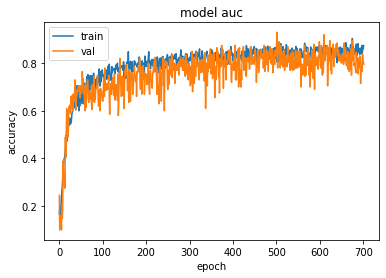

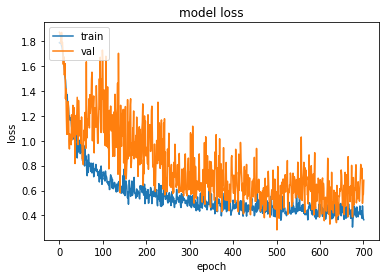

In [57]:
## Plot the model metrics from training
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model auc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [58]:
model.save('file_name.h5')

/usr/lib/python3/dist-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [ ]:
## Evaluate or predict the model's performance on Val_Data, Test_Data_17 or Test_Data_16 datasets
model.evaluate(Val_Data)


In [ ]:
## Sample a single image and use the CNN to make a classification prediction
def image_pred(data):
    train_img, train_class = data.next()
    train_img = train_img[0,:, :]
    img_array = tf.expand_dims(train_img, axis=0)
    plt.imshow(train_img)
    plt.title(' Truth: ' + str(train_class)+ " Pred: " + str(model.predict(img_array)[0]))
    
image_pred(Val_Data)

In [ ]:
## Compile the model with additional metrics. 

METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
      tf.keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
      tf.keras.metrics.SpecificityAtSensitivity(.82)
]

load_model.compile(loss='binary_crossentropy', metrics=METRICS,optimizer=opt)


In [ ]:
## Plot the ROC curve
def plot_roc(name, labels, predictions, **kwargs):
    fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)
    plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
    plt.xlabel('False positives [%]')
    plt.ylabel('True positives [%]')
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')
    

In [ ]:
## Predict the classes on the datasets' images 
predicted_labels_train = model.predict(Train_Data).squeeze()

In [ ]:
true_labels_train = train_frame['target'].to_numpy().reshape(35899,)
true_labels_train =true_labels_train.astype(int)

In [ ]:
thresholded_labels_train = (predicted_labels_train > 0.5).astype(int)

In [ ]:
predicted_labels_val = model.predict(Val_Data).squeeze()

In [59]:
predicted_labels_test = model.predict(Test_Data).squeeze()



In [60]:
true_labels_test =test_frame['target'].to_numpy().reshape(84657,)
thresholded_labels_test = np.argmax(predicted_labels_test, axis=1)

In [31]:
true_labels_test =true_labels_test.astype(int)

In [72]:
correct_test = np.sum(true_labels_test == thresholded_labels_test)

correct_test/thresholded_labels_test.shape[0]

0.8607675679506716

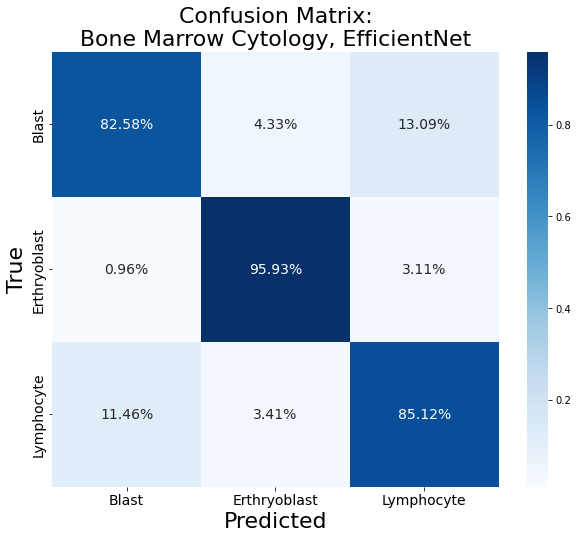

In [40]:
class_labels= ['Blast', 'Erthryoblast', 'Lymphocyte']

# Calculate the sum of each row (the number of true samples for each class)
row_sums = confusion_matrix_test.sum(axis=1, keepdims=True)

# Normalize the confusion matrix by dividing each element by the sum of its row
normalized_cm = confusion_matrix_test / row_sums

# # Plot normalized confusion matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt='.2%', cbar=True, xticklabels=class_labels, yticklabels=class_labels)
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('Weighted EfficientNet Test Confusion Matrix')
# plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt='.2%', cbar=True, xticklabels=class_labels, yticklabels=class_labels, annot_kws={"size": 14})
plt.xlabel('Predicted', fontsize=22)
plt.ylabel('True', fontsize=22)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Confusion Matrix:\nBone Marrow Cytology, EfficientNet', fontsize=22)
plt.show()


In [66]:
true_labels_test =true_labels_test.astype(int)

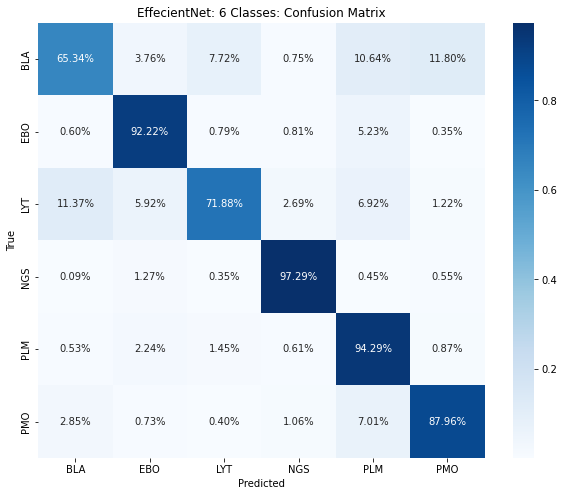

In [71]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

confusion_matrix_test = confusion_matrix(true_labels_test, thresholded_labels_test, labels=[0,1, 2, 3, 4, 5])

# Calculate the sum of each row (the number of true samples for each class)
row_sums = confusion_matrix_test.sum(axis=1, keepdims=True)


class_labels= ['BLA', 'EBO', 'LYT', 'NGS', 'PLM', 'PMO']


# Normalize the confusion matrix by dividing each element by the sum of its row
normalized_cm = confusion_matrix_test / row_sums

# Plot normalized confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt='.2%', cbar=True, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('EffecientNet: 6 Classes: Confusion Matrix')
plt.show()


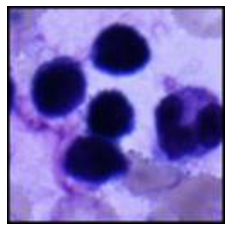

(256, 256, 3)

In [102]:
from PIL import Image

# Open the image
image_path = '/home/mikylab/manuscript/stargan/experiments/stargan_identity.bel01/results/failure/class2_img0_real.jpg'
image = Image.open(image_path)


# Resize the image to 256x256
image_resized = image.resize((256, 256))
image_test = np.asarray(image_resized)
# If you want to display the resized image using matplotlib
import matplotlib.pyplot as plt

plt.imshow(image_resized)
plt.axis('off')  # Turn off axis
plt.show()

image_test.shape


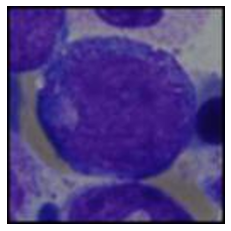

(256, 256, 3)

In [76]:
from PIL import Image

# Open the image
image_path = '/home/mikylab/manuscript/stargan/experiments/stargan_identity.class6/results/500/class0_img0_real.jpg'
image = Image.open(image_path)


# Resize the image to 256x256
image_resized = image.resize((256, 256))
image_test = np.asarray(image_resized)
# If you want to display the resized image using matplotlib
import matplotlib.pyplot as plt

plt.imshow(image_resized)
plt.axis('off')  # Turn off axis
plt.show()

image_test.shape


In [77]:
def model_predict(image_array, model):
    image_array = np.expand_dims(image_array, axis=0)
    tensor_predictions = tf.convert_to_tensor(image_array/255.)
    CNN_model_predictions = model.predict(tensor_predictions)
    return CNN_model_predictions

In [78]:
np.argmax(model_predict(image_test, model))

5

In [81]:
model_predict(image_test, model)

array([[1.6590384e-03, 2.7654343e-05, 4.6705551e-07, 1.6433292e-07,
        5.1583436e-07, 9.9831223e-01]], dtype=float32)

In [92]:
model_predict(image_test, model)

array([[1.6590384e-03, 2.7654343e-05, 4.6705551e-07, 1.6433292e-07,
        5.1583436e-07, 9.9831223e-01]], dtype=float32)

In [94]:
array = np.array([[1.6590384e-03, 2.7654343e-05, 4.6705551e-07, 1.6433292e-07,
                   5.1583436e-07, 9.9831223e-01]], dtype=float)

# Convert to percentages with four decimal places
percentages = np.round(array * 100, 2)

print(percentages)

[[ 0.17  0.    0.    0.    0.   99.83]]


In [101]:
print(1.6590384*10e-3)
print(2.7654343*10e-05)
print(4.6705551*10e-07)
print(1.6433292*10e-07)
print(5.1583436*10e-07)
print(9.9831223*10e-01)

0.016590384
0.00027654343
4.670555099999999e-06
1.6433291999999998e-06
5.1583436e-06
9.9831223
